In [1]:
import psycopg2
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

try:
    conn = psycopg2.connect(
        dbname="northwind",
        user="postgres",
        password="zulyan",
        host="localhost",
        port="5432"
    )
    print("Koneksi berhasil!")
except Exception as e:
    print(f"Gagal terhubung: {e}")


Koneksi berhasil!


In [2]:
query = """  
select 
	o."OrderID" as id_pesan,
	o."CustomerID" as id_pelanggan,
	c."CompanyName" as nama_pelanggan,
	c."City" as kota,
	c."Country" as negara,
	od."ProductID" as id_produk,
	p."ProductName" as nama_produk,
	c2."CategoryName" as kategori_produk,
	od."UnitPrice" as harga,
	od."Quantity" as jumlah_transaksi,
	od."Discount" as diskon,
	o."OrderDate" as tanggal_pesan,
	o."RequiredDate" as estimasi_tiba,
	o."ShippedDate" as tanggal_tiba,
	o."ShipVia" as id_shipper,
	s."CompanyName" as nama_jasa_pengiriman
from orders o 
left join order_details od on od."OrderID" = o."OrderID" 
left join customers c on c."CustomerID" = o."CustomerID"
left join products p on p."ProductID" = od."ProductID" 
left join shippers s on s."ShipperID" = o."ShipVia"
left join categories c2 on c2."CategoryID"  = p."CategoryID";
"""

# Eksekusi query dan ambil hasil sebagai DataFrame
df = pd.read_sql(query, conn)

# Tampilkan hasil
df

,id_pesan,id_pelanggan,nama_pelanggan,kota,negara,id_produk,nama_produk,kategori_produk,harga,jumlah_transaksi,diskon,tanggal_pesan,estimasi_tiba,tanggal_tiba,id_shipper,nama_jasa_pengiriman
0,10248,VINET,Vins et alcools Chevalier,Reims,France,11,Queso Cabrales,Dairy Products,14.00,12,0.00,1996-07-04,1996-08-01,1996-07-16,3,Federal Shipping
1,10248,VINET,Vins et alcools Chevalier,Reims,France,42,Singaporean Hokkien Fried Mee,Grains/Cereals,9.80,10,0.00,1996-07-04,1996-08-01,1996-07-16,3,Federal Shipping
2,10248,VINET,Vins et alcools Chevalier,Reims,France,72,Mozzarella di Giovanni,Dairy Products,34.80,5,0.00,1996-07-04,1996-08-01,1996-07-16,3,Federal Shipping
3,10249,TOMSP,Toms Spezialitäten,Münster,Germany,14,Tofu,Produce,18.60,9,0.00,1996-07-05,1996-08-16,1996-07-10,1,Speedy Express
4,10249,TOMSP,Toms Spezialitäten,Münster,Germany,51,Manjimup Dried Apples,Produce,42.40,40,0.00,1996-07-05,1996-08-16,1996-07-10,1,Speedy Express
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,11077,RATTC,Rattlesnake Canyon Grocery,Albuquerque,USA,66,Louisiana Hot Spiced Okra,Condiments,17.00,1,0.00,1998-05-06,1998-06-03,None,2,United Package
2152,11077,RATTC,Rattlesnake Canyon Grocery,Albuquerque,USA,73,Röd Kaviar,Seafood,15.00,2,0.01,1998-05-06,1998-06-03,None,2,United Package
2153,11077,RATTC,Rattlesnake Canyon Grocery,Albuquerque,USA,75,Rhönbräu Klosterbier,Beverages,7.75,4,0.00,1998-05-06,1998-06-03,None,2,United Package
2154,11077,RATTC,Rattlesnake Canyon Grocery,Albuquerque,USA,77,Original Frankfurter grüne Soße,Condiments,13.00,2,0.00,1998-05-06,1998-06-03,None,2,United Package


In [3]:
# jumlah nilai null
df.isna().sum()

id_pesan                 0
id_pelanggan             0
nama_pelanggan           0
kota                     0
negara                   0
id_produk                0
nama_produk              0
kategori_produk          0
harga                    0
jumlah_transaksi         0
diskon                   0
tanggal_pesan            0
estimasi_tiba            0
tanggal_tiba            73
id_shipper               0
nama_jasa_pengiriman     0
dtype: int64

In [4]:
print(f'jumlah data duplikat {df.duplicated().sum()}')

jumlah data duplikat 0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_pesan              2156 non-null   int64  
 1   id_pelanggan          2156 non-null   object 
 2   nama_pelanggan        2156 non-null   object 
 3   kota                  2156 non-null   object 
 4   negara                2156 non-null   object 
 5   id_produk             2156 non-null   int64  
 6   nama_produk           2156 non-null   object 
 7   kategori_produk       2156 non-null   object 
 8   harga                 2156 non-null   float64
 9   jumlah_transaksi      2156 non-null   int64  
 10  diskon                2156 non-null   float64
 11  tanggal_pesan         2156 non-null   object 
 12  estimasi_tiba         2156 non-null   object 
 13  tanggal_tiba          2083 non-null   object 
 14  id_shipper            2156 non-null   int64  
 15  nama_jasa_pengiriman 

In [6]:
# ubah tipe data 
df[['id_pesan','id_pelanggan','id_produk','id_shipper']] = df[['id_pesan','id_pelanggan','id_produk','id_shipper']].astype('object')

df['tanggal_pesan'] = pd.to_datetime(df['tanggal_pesan'], yearfirst= True, errors='coerce')
df['estimasi_tiba'] = pd.to_datetime(df['estimasi_tiba'], yearfirst= True, errors='coerce')
df['tanggal_tiba'] = pd.to_datetime(df['tanggal_tiba'], yearfirst= True, errors='coerce')

df['tahun'] = df['tanggal_pesan'].dt.year
df['bulan'] = df['tanggal_pesan'].dt.month_name()
df['kode_bulan'] = df['tanggal_pesan'].dt.month
df['tanggal'] = df['tanggal_pesan'].dt.day
df['hari'] = df['tanggal_pesan'].dt.day_name()

In [7]:
# perhitungan revenue
df['revenue'] = (df['jumlah_transaksi'] * df['harga']) * (1 - df['diskon'])

# lama waktu pengiriman 
df['lama_pengiriman'] = (df['tanggal_tiba'] - df['tanggal_pesan']).dt.days

# kategorikan sebagai diskon dan nondiskon 
df['status_diskon'] = df['diskon'].apply(lambda x: 'Discount' if x > 0 else 'No Discount')

# pemetaan pemesanan yang terlambat dan yang tepat waktu 
df['status_pengiriman'] = df.apply(
    lambda x: 'Terlambat'
    if pd.isna(x['tanggal_tiba'])
    else 'Terlambat'
    if x['tanggal_tiba'] > x['estimasi_tiba']
    else 'Tepat Waktu',
    axis=1
)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_pesan              2156 non-null   object        
 1   id_pelanggan          2156 non-null   object        
 2   nama_pelanggan        2156 non-null   object        
 3   kota                  2156 non-null   object        
 4   negara                2156 non-null   object        
 5   id_produk             2156 non-null   object        
 6   nama_produk           2156 non-null   object        
 7   kategori_produk       2156 non-null   object        
 8   harga                 2156 non-null   float64       
 9   jumlah_transaksi      2156 non-null   int64         
 10  diskon                2156 non-null   float64       
 11  tanggal_pesan         2156 non-null   datetime64[ns]
 12  estimasi_tiba         2156 non-null   datetime64[ns]
 13  tanggal_tiba      

In [9]:
# urutkan kolom 
columns = ['id_pesan', 'id_pelanggan', 'nama_pelanggan', 'kota', 'negara',
        'id_produk', 'nama_produk', 'kategori_produk', 'harga','jumlah_transaksi', 
        'diskon', 'status_diskon', 'tanggal_pesan', 'tahun', 'bulan', 'kode_bulan', 'tanggal', 'hari', 
        'estimasi_tiba','tanggal_tiba', 'lama_pengiriman','status_pengiriman', 'id_shipper', 
        'nama_jasa_pengiriman','revenue']
df = df[columns]

In [10]:
df

,id_pesan,id_pelanggan,nama_pelanggan,kota,negara,id_produk,nama_produk,kategori_produk,harga,jumlah_transaksi,diskon,status_diskon,tanggal_pesan,tahun,bulan,kode_bulan,tanggal,hari,estimasi_tiba,tanggal_tiba,lama_pengiriman,status_pengiriman,id_shipper,nama_jasa_pengiriman,revenue
0,10248,VINET,Vins et alcools Chevalier,Reims,France,11,Queso Cabrales,Dairy Products,14.00,12,0.00,No Discount,1996-07-04,1996,July,7,4,Thursday,1996-08-01,1996-07-16,12.0,Tepat Waktu,3,Federal Shipping,168.0
1,10248,VINET,Vins et alcools Chevalier,Reims,France,42,Singaporean Hokkien Fried Mee,Grains/Cereals,9.80,10,0.00,No Discount,1996-07-04,1996,July,7,4,Thursday,1996-08-01,1996-07-16,12.0,Tepat Waktu,3,Federal Shipping,98.0
2,10248,VINET,Vins et alcools Chevalier,Reims,France,72,Mozzarella di Giovanni,Dairy Products,34.80,5,0.00,No Discount,1996-07-04,1996,July,7,4,Thursday,1996-08-01,1996-07-16,12.0,Tepat Waktu,3,Federal Shipping,174.0
3,10249,TOMSP,Toms Spezialitäten,Münster,Germany,14,Tofu,Produce,18.60,9,0.00,No Discount,1996-07-05,1996,July,7,5,Friday,1996-08-16,1996-07-10,5.0,Tepat Waktu,1,Speedy Express,167.4
4,10249,TOMSP,Toms Spezialitäten,Münster,Germany,51,Manjimup Dried Apples,Produce,42.40,40,0.00,No Discount,1996-07-05,1996,July,7,5,Friday,1996-08-16,1996-07-10,5.0,Tepat Waktu,1,Speedy Express,1696.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,11077,RATTC,Rattlesnake Canyon Grocery,Albuquerque,USA,66,Louisiana Hot Spiced Okra,Condiments,17.00,1,0.00,No Discount,1998-05-06,1998,May,5,6,Wednesday,1998-06-03,NaT,NaN,Terlambat,2,United Package,17.0
2152,11077,RATTC,Rattlesnake Canyon Grocery,Albuquerque,USA,73,Röd Kaviar,Seafood,15.00,2,0.01,Discount,1998-05-06,1998,May,5,6,Wednesday,1998-06-03,NaT,NaN,Terlambat,2,United Package,29.7
2153,11077,RATTC,Rattlesnake Canyon Grocery,Albuquerque,USA,75,Rhönbräu Klosterbier,Beverages,7.75,4,0.00,No Discount,1998-05-06,1998,May,5,6,Wednesday,1998-06-03,NaT,NaN,Terlambat,2,United Package,31.0
2154,11077,RATTC,Rattlesnake Canyon Grocery,Albuquerque,USA,77,Original Frankfurter grüne Soße,Condiments,13.00,2,0.00,No Discount,1998-05-06,1998,May,5,6,Wednesday,1998-06-03,NaT,NaN,Terlambat,2,United Package,26.0


#### Identifikasi Missing Value

<Axes: >

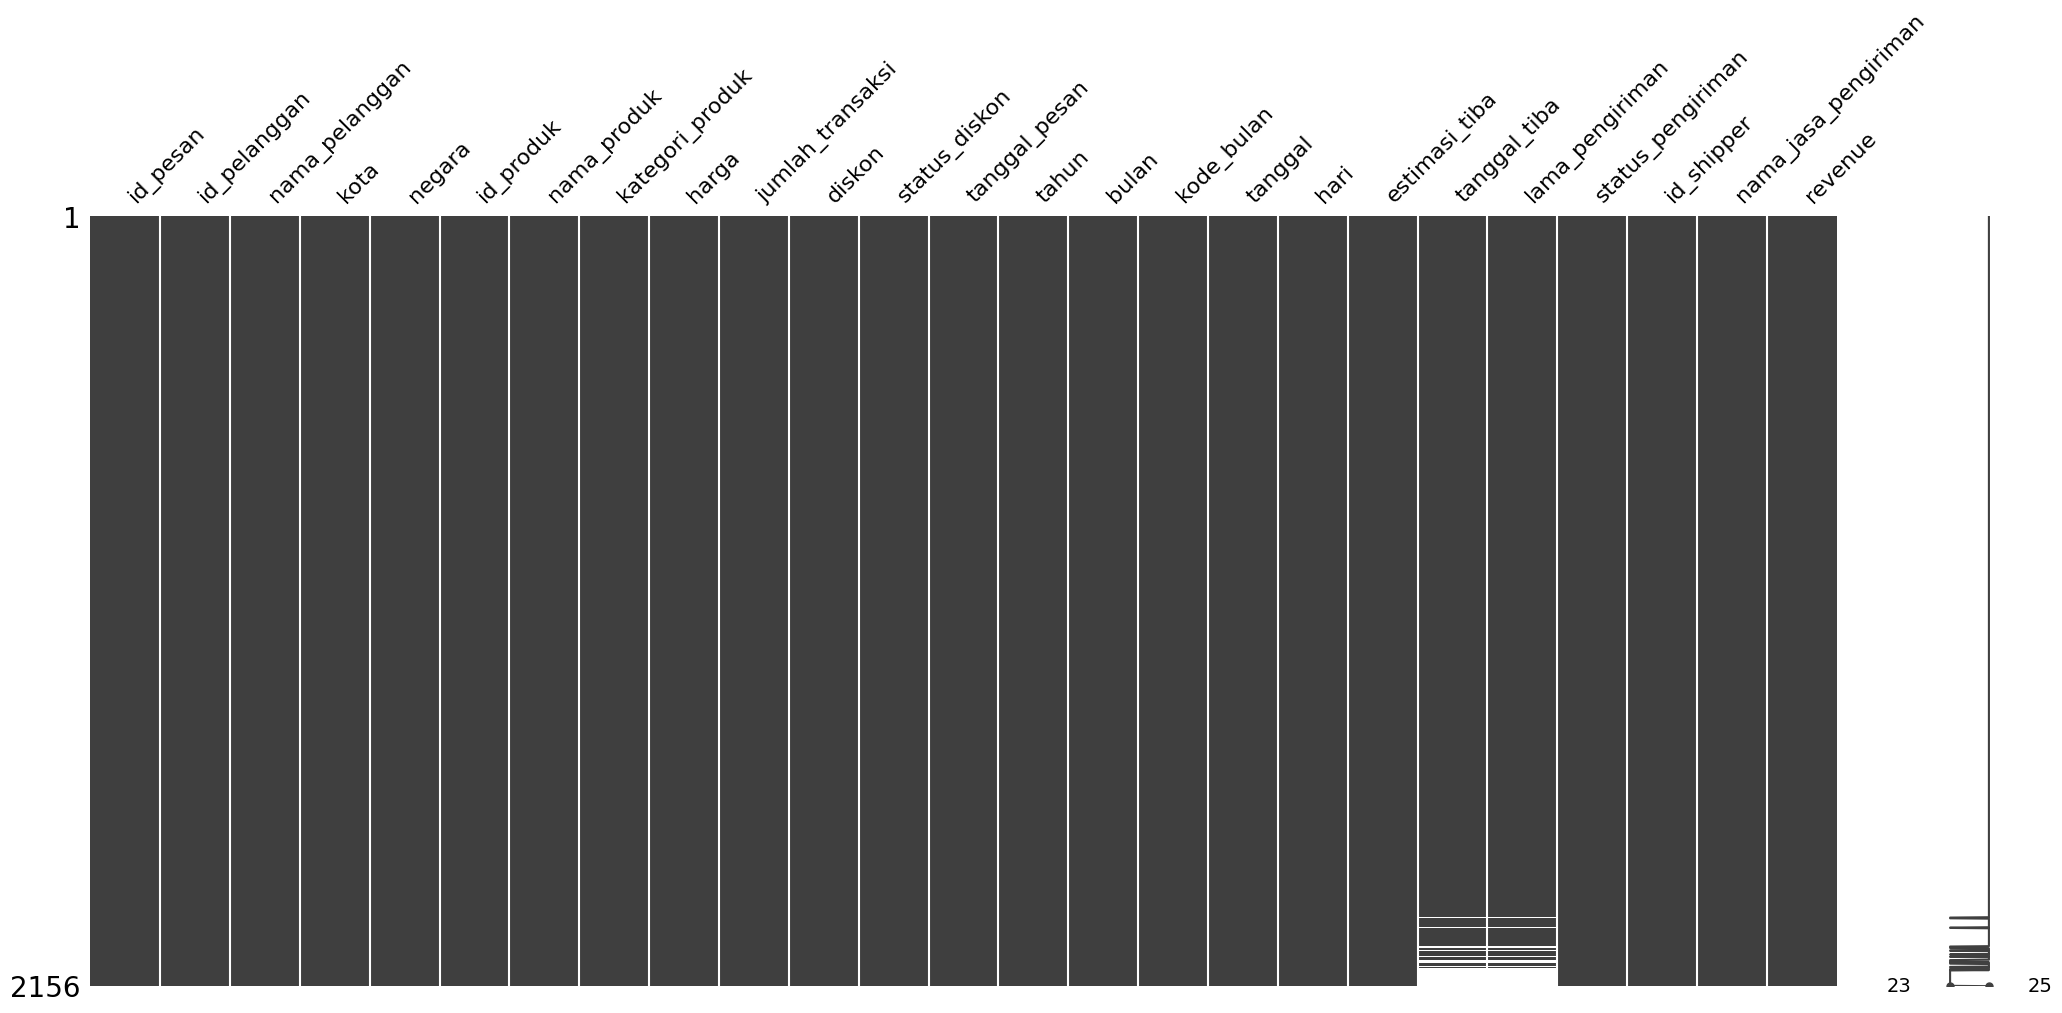

In [11]:
# Identifikasi missing value 
import missingno as msno
msno.matrix(df) 

In [12]:
# uji hubungan kolom missing dengan kolom kategorik lainnya
import pandas as pd
from scipy.stats import chi2_contingency

df['is_missing'] = df['tanggal_tiba'].isnull().astype(int)

# Tabel kontingensi antara kurir dan status missing
contingency_table = pd.crosstab(df['nama_jasa_pengiriman'], df['is_missing'])

# Jalankan Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Hasil: Signifikan! Terdapat hubungan antara Kurir dengan hilangnya data (MAR).")
else:
    print("Hasil: Tidak Signifikan. Data hilang tersebar merata di semua kurir (MCAR).")

P-Value: 2.3002576954558838e-07
Hasil: Signifikan! Terdapat hubungan antara Kurir dengan hilangnya data (MAR).


#### Inputasi Nilai Missing

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Ubah kategori jadi angka (karena tidak ada null, bisa langsung fit_transform)
df['nama_jasa_encoded'] = le.fit_transform(df['nama_jasa_pengiriman'])

# Pilih kolom untuk KNN (misal yang ada null hanya di lama_pengiriman)
cols_to_use = ['nama_jasa_encoded', 'lama_pengiriman']

# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[cols_to_use])

# Imputasi KNN (untuk mengisi 'lama_pengiriman' yang hilang)
imputer = KNNImputer(n_neighbors=5)
imputed_scaled = imputer.fit_transform(scaled_data)

# Balikin skala dan masukkan ke df
final_data = scaler.inverse_transform(imputed_scaled)
df[cols_to_use] = final_data

# Rapikan tipe data
df['lama_pengiriman'] = df['lama_pengiriman'].round().astype(int)
df['nama_jasa_encoded'] = df['nama_jasa_encoded'].round().astype(int)

In [14]:
df

,id_pesan,id_pelanggan,nama_pelanggan,kota,negara,id_produk,nama_produk,kategori_produk,harga,jumlah_transaksi,diskon,status_diskon,tanggal_pesan,tahun,bulan,kode_bulan,tanggal,hari,estimasi_tiba,tanggal_tiba,lama_pengiriman,status_pengiriman,id_shipper,nama_jasa_pengiriman,revenue,is_missing,nama_jasa_encoded
0,10248,VINET,Vins et alcools Chevalier,Reims,France,11,Queso Cabrales,Dairy Products,14.00,12,0.00,No Discount,1996-07-04,1996,July,7,4,Thursday,1996-08-01,1996-07-16,12,Tepat Waktu,3,Federal Shipping,168.0,0,0
1,10248,VINET,Vins et alcools Chevalier,Reims,France,42,Singaporean Hokkien Fried Mee,Grains/Cereals,9.80,10,0.00,No Discount,1996-07-04,1996,July,7,4,Thursday,1996-08-01,1996-07-16,12,Tepat Waktu,3,Federal Shipping,98.0,0,0
2,10248,VINET,Vins et alcools Chevalier,Reims,France,72,Mozzarella di Giovanni,Dairy Products,34.80,5,0.00,No Discount,1996-07-04,1996,July,7,4,Thursday,1996-08-01,1996-07-16,12,Tepat Waktu,3,Federal Shipping,174.0,0,0
3,10249,TOMSP,Toms Spezialitäten,Münster,Germany,14,Tofu,Produce,18.60,9,0.00,No Discount,1996-07-05,1996,July,7,5,Friday,1996-08-16,1996-07-10,5,Tepat Waktu,1,Speedy Express,167.4,0,1
4,10249,TOMSP,Toms Spezialitäten,Münster,Germany,51,Manjimup Dried Apples,Produce,42.40,40,0.00,No Discount,1996-07-05,1996,July,7,5,Friday,1996-08-16,1996-07-10,5,Tepat Waktu,1,Speedy Express,1696.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,11077,RATTC,Rattlesnake Canyon Grocery,Albuquerque,USA,66,Louisiana Hot Spiced Okra,Condiments,17.00,1,0.00,No Discount,1998-05-06,1998,May,5,6,Wednesday,1998-06-03,NaT,21,Terlambat,2,United Package,17.0,1,2
2152,11077,RATTC,Rattlesnake Canyon Grocery,Albuquerque,USA,73,Röd Kaviar,Seafood,15.00,2,0.01,Discount,1998-05-06,1998,May,5,6,Wednesday,1998-06-03,NaT,21,Terlambat,2,United Package,29.7,1,2
2153,11077,RATTC,Rattlesnake Canyon Grocery,Albuquerque,USA,75,Rhönbräu Klosterbier,Beverages,7.75,4,0.00,No Discount,1998-05-06,1998,May,5,6,Wednesday,1998-06-03,NaT,21,Terlambat,2,United Package,31.0,1,2
2154,11077,RATTC,Rattlesnake Canyon Grocery,Albuquerque,USA,77,Original Frankfurter grüne Soße,Condiments,13.00,2,0.00,No Discount,1998-05-06,1998,May,5,6,Wednesday,1998-06-03,NaT,21,Terlambat,2,United Package,26.0,1,2


In [15]:
# Hitung waktu_tiba: tanggal_pesan + durasi (hari)
df['tanggal_tiba_baru'] = df['tanggal_pesan'] + pd.to_timedelta(df['lama_pengiriman'], unit='D')

# Isi hanya baris yang sebelumnya kosong di kolom asli
df['tanggal_tiba'] = df['tanggal_tiba'].fillna(df['tanggal_tiba_baru'])

# hapus kolom yang tidak dipakai
df.drop(columns=['tanggal_tiba_baru'], inplace=True)
df.drop(columns=['is_missing'], inplace=True)
df.drop(columns=['nama_jasa_encoded'], inplace=True)

In [16]:
df

,id_pesan,id_pelanggan,nama_pelanggan,kota,negara,id_produk,nama_produk,kategori_produk,harga,jumlah_transaksi,diskon,status_diskon,tanggal_pesan,tahun,bulan,kode_bulan,tanggal,hari,estimasi_tiba,tanggal_tiba,lama_pengiriman,status_pengiriman,id_shipper,nama_jasa_pengiriman,revenue
0,10248,VINET,Vins et alcools Chevalier,Reims,France,11,Queso Cabrales,Dairy Products,14.00,12,0.00,No Discount,1996-07-04,1996,July,7,4,Thursday,1996-08-01,1996-07-16,12,Tepat Waktu,3,Federal Shipping,168.0
1,10248,VINET,Vins et alcools Chevalier,Reims,France,42,Singaporean Hokkien Fried Mee,Grains/Cereals,9.80,10,0.00,No Discount,1996-07-04,1996,July,7,4,Thursday,1996-08-01,1996-07-16,12,Tepat Waktu,3,Federal Shipping,98.0
2,10248,VINET,Vins et alcools Chevalier,Reims,France,72,Mozzarella di Giovanni,Dairy Products,34.80,5,0.00,No Discount,1996-07-04,1996,July,7,4,Thursday,1996-08-01,1996-07-16,12,Tepat Waktu,3,Federal Shipping,174.0
3,10249,TOMSP,Toms Spezialitäten,Münster,Germany,14,Tofu,Produce,18.60,9,0.00,No Discount,1996-07-05,1996,July,7,5,Friday,1996-08-16,1996-07-10,5,Tepat Waktu,1,Speedy Express,167.4
4,10249,TOMSP,Toms Spezialitäten,Münster,Germany,51,Manjimup Dried Apples,Produce,42.40,40,0.00,No Discount,1996-07-05,1996,July,7,5,Friday,1996-08-16,1996-07-10,5,Tepat Waktu,1,Speedy Express,1696.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,11077,RATTC,Rattlesnake Canyon Grocery,Albuquerque,USA,66,Louisiana Hot Spiced Okra,Condiments,17.00,1,0.00,No Discount,1998-05-06,1998,May,5,6,Wednesday,1998-06-03,1998-05-27,21,Terlambat,2,United Package,17.0
2152,11077,RATTC,Rattlesnake Canyon Grocery,Albuquerque,USA,73,Röd Kaviar,Seafood,15.00,2,0.01,Discount,1998-05-06,1998,May,5,6,Wednesday,1998-06-03,1998-05-27,21,Terlambat,2,United Package,29.7
2153,11077,RATTC,Rattlesnake Canyon Grocery,Albuquerque,USA,75,Rhönbräu Klosterbier,Beverages,7.75,4,0.00,No Discount,1998-05-06,1998,May,5,6,Wednesday,1998-06-03,1998-05-27,21,Terlambat,2,United Package,31.0
2154,11077,RATTC,Rattlesnake Canyon Grocery,Albuquerque,USA,77,Original Frankfurter grüne Soße,Condiments,13.00,2,0.00,No Discount,1998-05-06,1998,May,5,6,Wednesday,1998-06-03,1998-05-27,21,Terlambat,2,United Package,26.0


#### Deteksi Outlier

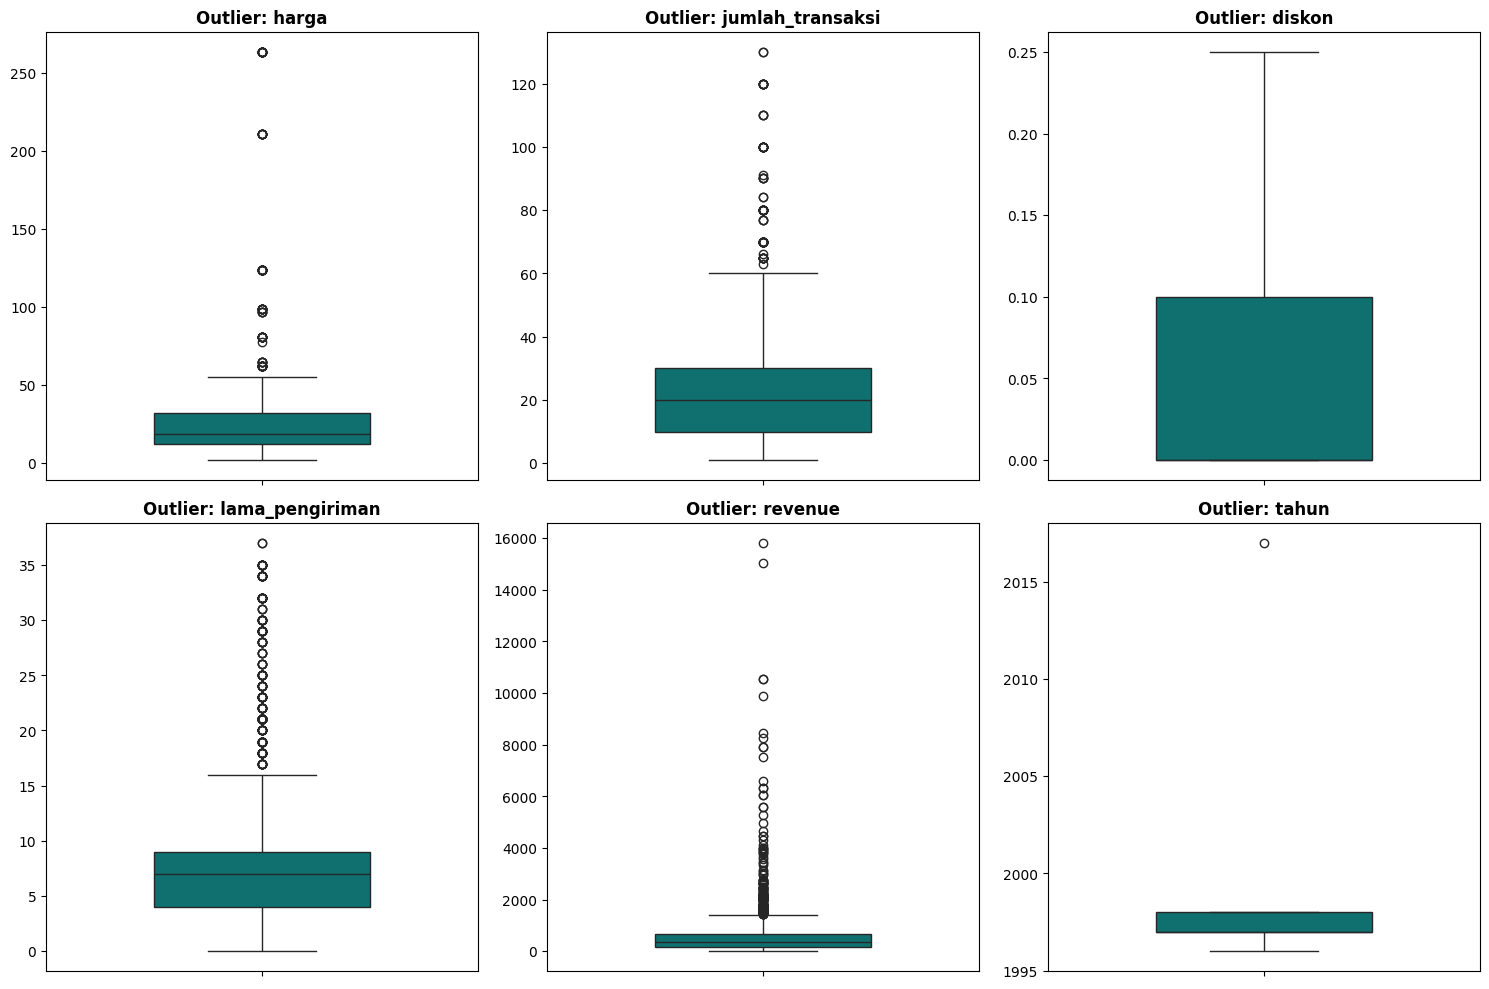

In [18]:
import math

# custom kolom
cols_to_check = ['harga','jumlah_transaksi','diskon','lama_pengiriman','revenue','tahun']

# jumlah kolom subplots
cols_per_row = 3
n_rows = math.ceil(len(cols_to_check) / cols_per_row)

# figur dan axes
fig, ax = plt.subplots(n_rows, cols_per_row, figsize=(15, 5 * n_rows))

# Flatten axes agar mudah di-looping (karena axes sekarang bentuknya 2D array)
axes_flat = ax.flatten()

# 4. Looping Boxplot
for i, col in enumerate(cols_to_check):
    sns.boxplot(y=df[col], ax=axes_flat[i], color='teal', width=0.5)
    axes_flat[i].set_title(f'Outlier: {col}', fontweight='bold')
    axes_flat[i].set_ylabel('')

# 5. Penting: Hapus subplot yang kosong (jika 7 kolom di grid 3x3, ada 2 sisa)
for j in range(i + 1, len(axes_flat)):
    fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()

In [19]:
print("RINGKASAN OUTLIER (Metode IQR):")
print("-" * 30)

for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_count = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
    percentage = (outliers_count / len(df)) * 100
    
    print(f"{col:20} : {outliers_count} data ({percentage:.2f}%)")

RINGKASAN OUTLIER (Metode IQR):
------------------------------
harga                : 98 data (4.55%)
jumlah_transaksi     : 87 data (4.04%)
diskon               : 0 data (0.00%)
lama_pengiriman      : 280 data (12.99%)
revenue              : 170 data (7.88%)
tahun                : 1 data (0.05%)


In [21]:
# Kolom numerik
cols_to_check = ['harga','jumlah_transaksi','diskon','lama_pengiriman','revenue','tahun']

print(f"{'KOLOM':<20} | {'JML OUTLIER':<12} | {'NILAI OUTLIER'}")
print("-" * 120)

# Looping untuk deteksi dan tampilkan nilai
for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Ambil baris yang outlier
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    
    if not outliers.empty:
        # Ambil 10 nilai outlier unik pertama 
        sample_values = sorted(outliers.unique())[:10]
        print(f"{col:<20} | {len(outliers):<12} | {sample_values}")
    else:
        print(f"{col:<20} | {'0':<12} | -")

KOLOM                | JML OUTLIER  | NILAI OUTLIER
------------------------------------------------------------------------------------------------------------------------
harga                | 98           | [62.5, 64.8, 77.6, 81.0, 97.0, 99.0, 123.79, 210.8, 263.5]
jumlah_transaksi     | 87           | [63, 65, 66, 70, 77, 80, 84, 90, 91, 100]
diskon               | 0            | -
lama_pengiriman      | 280          | [17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
revenue              | 170          | [1425.0, 1428.0, 1440.0, 1472.5, 1479.0, 1484.0, 1485.0, 1494.5, 1496.0, 1500.0]
tahun                | 1            | [2017]


In [22]:
# Bedah kolom lama_pengiriman
Q1 = df['lama_pengiriman'].quantile(0.25)
Q3 = df['lama_pengiriman'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter baris yang mengandung outlier
outlier_data = df[(df['lama_pengiriman'] < lower_bound) | (df['lama_pengiriman'] > upper_bound)]

# Tampilkan nilai uniknya saja atau seluruh barisnya
print("Daftar Nilai Outlier:")
print(outlier_data['lama_pengiriman'].unique()) 

# Jika ingin melihat detail transaksinya
outlier_data

Daftar Nilai Outlier:
[30 18 29 26 34 19 22 32 24 21 35 23 20 17 27 25 31 37 28]


,id_pesan,id_pelanggan,nama_pelanggan,kota,negara,id_produk,nama_produk,kategori_produk,harga,jumlah_transaksi,diskon,status_diskon,tanggal_pesan,tahun,bulan,kode_bulan,tanggal,hari,estimasi_tiba,tanggal_tiba,lama_pengiriman,status_pengiriman,id_shipper,nama_jasa_pengiriman,revenue
47,10264,FOLKO,Folk och fä HB,Bräcke,Sweden,2,Chang,Beverages,15.20,35,0.00,No Discount,1996-07-24,1996,July,7,24,Wednesday,1996-08-21,1996-08-23,30,Terlambat,3,Federal Shipping,532.000
48,10264,FOLKO,Folk och fä HB,Bräcke,Sweden,41,Jack's New England Clam Chowder,Seafood,7.70,25,0.15,Discount,1996-07-24,1996,July,7,24,Wednesday,1996-08-21,1996-08-23,30,Terlambat,3,Federal Shipping,163.625
49,10265,BLONP,Blondesddsl père et fils,Strasbourg,France,17,Alice Mutton,Meat/Poultry,31.20,30,0.00,No Discount,1996-07-25,1996,July,7,25,Thursday,1996-08-22,1996-08-12,18,Tepat Waktu,1,Speedy Express,936.000
50,10265,BLONP,Blondesddsl père et fils,Strasbourg,France,70,Outback Lager,Beverages,12.00,20,0.00,No Discount,1996-07-25,1996,July,7,25,Thursday,1996-08-22,1996-08-12,18,Tepat Waktu,1,Speedy Express,240.000
61,10271,SPLIR,Split Rail Beer & Ale,Lander,USA,33,Geitost,Dairy Products,2.00,24,0.00,No Discount,1996-08-01,1996,August,8,1,Thursday,1996-08-29,1996-08-30,29,Terlambat,2,United Package,48.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,11077,RATTC,Rattlesnake Canyon Grocery,Albuquerque,USA,64,Wimmers gute Semmelknödel,Grains/Cereals,33.25,2,0.03,Discount,1998-05-06,1998,May,5,6,Wednesday,1998-06-03,1998-05-27,21,Terlambat,2,United Package,64.505
2151,11077,RATTC,Rattlesnake Canyon Grocery,Albuquerque,USA,66,Louisiana Hot Spiced Okra,Condiments,17.00,1,0.00,No Discount,1998-05-06,1998,May,5,6,Wednesday,1998-06-03,1998-05-27,21,Terlambat,2,United Package,17.000
2152,11077,RATTC,Rattlesnake Canyon Grocery,Albuquerque,USA,73,Röd Kaviar,Seafood,15.00,2,0.01,Discount,1998-05-06,1998,May,5,6,Wednesday,1998-06-03,1998-05-27,21,Terlambat,2,United Package,29.700
2153,11077,RATTC,Rattlesnake Canyon Grocery,Albuquerque,USA,75,Rhönbräu Klosterbier,Beverages,7.75,4,0.00,No Discount,1998-05-06,1998,May,5,6,Wednesday,1998-06-03,1998-05-27,21,Terlambat,2,United Package,31.000


In [23]:
# buang outlier
tahun_valid = [1996,1997,1998]
df = df[df['tahun'].isin(tahun_valid)]

#### Distribusi Data

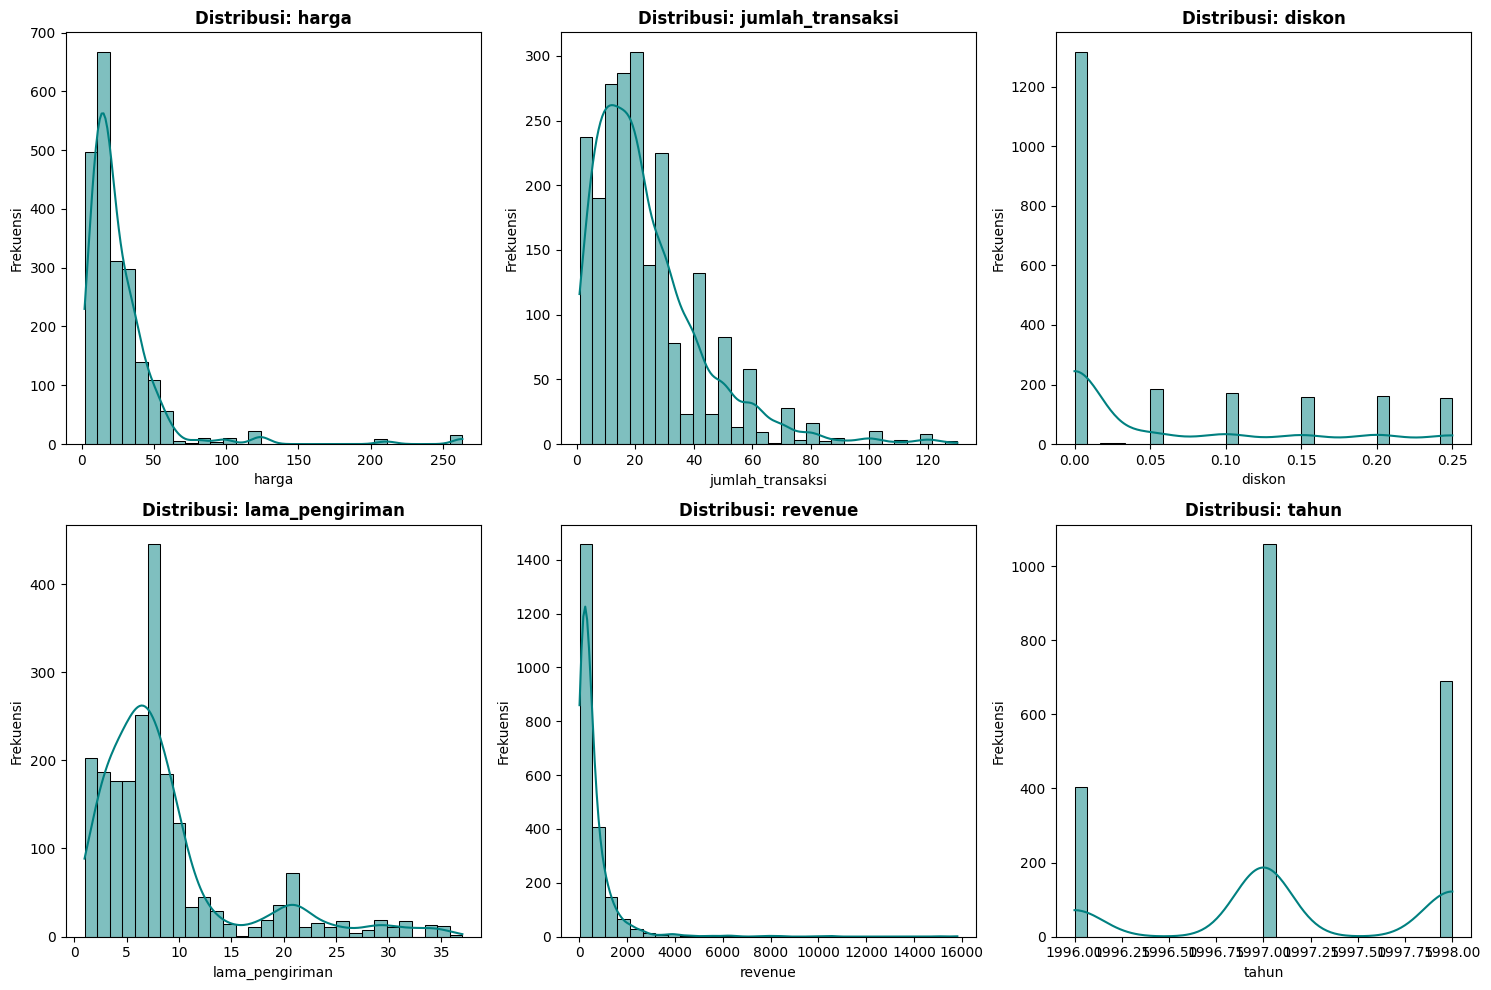

In [24]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Grid
cols_per_row = 3
n_rows = math.ceil(len(cols_to_check) / cols_per_row)

# Plot
fig, ax = plt.subplots(n_rows, cols_per_row, figsize=(15, 5 * n_rows))
axes_flat = ax.flatten()

# Looping Histogram
for i, col in enumerate(cols_to_check):
    sns.histplot(x=df[col], ax=axes_flat[i], color='teal', kde=True, bins=30)
    
    axes_flat[i].set_title(f'Distribusi: {col}', fontweight='bold', fontsize=12)
    axes_flat[i].set_xlabel(col)
    axes_flat[i].set_ylabel('Frekuensi')

# Hapus subplot sisa
for j in range(i + 1, len(axes_flat)):
    fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()

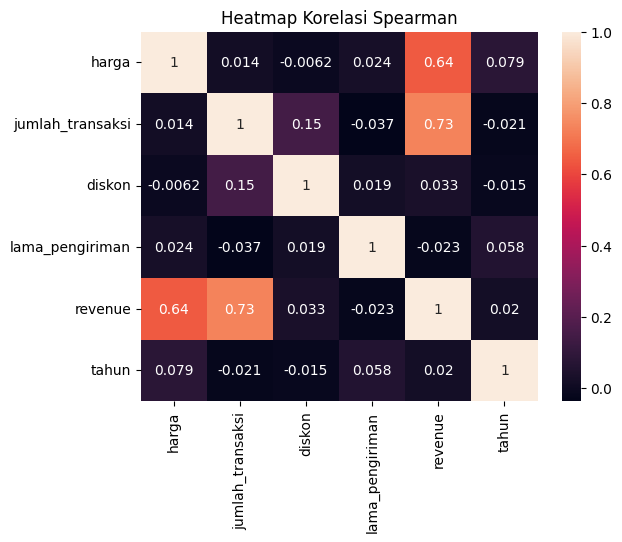

In [25]:
# Spearman
df_corr = df[cols_to_check]

corr_s = df_corr.corr(method='spearman')
sns.heatmap(data = corr_s, annot=True)
plt.title('Heatmap Korelasi Spearman')
plt.show()

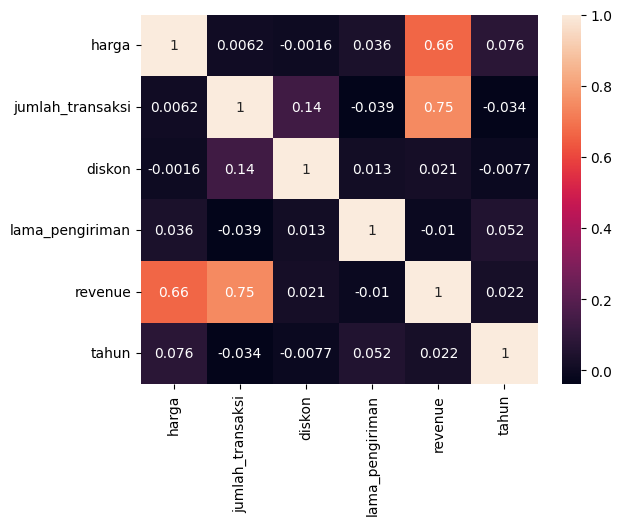

In [26]:
# Pearson
df_corr = df[cols_to_check]

df_corr_log = np.log1p(df_corr)

corr_p = df_corr_log.corr(method='pearson')
sns.heatmap(data = corr_p, annot=True)
plt.show()

In [27]:
df.to_csv('northwind_data_mart.csv', index=False)